In [4]:
# !pip install tensorflow tensorboard
# import tensorboard as tb
# !tb.shutdown()
# %load_ext tensorboard
# %tensorboard --logdir=logs_feta_mom_brain_params_32_64 --host localhost  # 1
# %tensorboard --logdir=logs_feta_mom_brain_params_64_64_64_64_64 --host localhost  # 2
# %tensorboard --logdir=logs_feta_mom_brain_params_128_128_128_128_128 --host localhost  # 3
# %tensorboard --logdir=logs_feta_mom_brain_params_64_128_256 --host localhost  # 4
# %tensorboard --logdir=logs_feta_mom_brain_params_64_128_256_512 --host localhost  # 5
# %tensorboard --logdir=logs_feta_mom_brain_params_16_32_64_64_64_64_64_nc_2_bs_2 --host localhost  # 6
# %tensorboard --logdir=logs_feta_mom_brain_params_16_32_64_64_64_128_128_nc_2_bs_1 --host localhost  # 7 with soft dice
# %tensorboard --logdir=logs_feta_mom_brain_params_16_32_64_64_64_64_64_nc_4 --host localhost  # 8
# %tensorboard --logdir=logs_feta_mom_brain_params_16_32_64_64_64_64_64_nc_2_bs_16 --host localhost  # 9
# %tensorboard --logdir=logs_feta_mom_brain_params_16_32_64_64_64_64_64_nc_2_bs_1 --host localhost  # 10
# %tensorboard --logdir=logs_feta_mom_brain_params_16_16_32_32_64_64_128_128_256_256_nc_2_bs_1 --host localhost  # 11 with soft dice
# %tensorboard --logdir=logs_feta_mom_brain_params_16_16_32_32_64_64_64_64_64_64_64_64_64_64_nc_2_bs_1 --host localhost  # 12 with soft dice
%reload_ext tensorboard
# %tensorboard --logdir=logs_shapes_mgh_brain_params_dim_256_16_16_32_32_64_64_128_128_256_256_wm_0.2_shift_20 --host localhost --port 6023
# %tensorboard --logdir=logs_fov_shapes_k_5_brain_mom_brain_params_dim_256_16_16_32_32_64_64_128_128_256_256_nc_2_bs_1_sc_0.8_zb_0.1 --host localhost   --port 6023 # synth
# %tensorboard --logdir=logs_feta_mgh_body_params_dim_256_16_16_32_32_64_64_128_128_256_256_wm_0.2_shift_20 --host localhost   --port 6023 
# %tensorboard --logdir=logs_mgh_brain_mgh_body_params_dim_256_16_16_32_32_64_64_128_128_256_256_wm_0.2_shift_20 --host localhost   --port 6023 
# %tensorboard --logdir=logs_feta_mgh_body_192 --host localhost   --port 6024 #6
# %tensorboard --logdir=logs_mgh_brain_mgh_body_192 --host localhost   --port 6023 # 5
# %tensorboard --logdir=logs_feta_mgh_brain_mgh_body_192 --host localhost   --port 6022 # 4

# %tensorboard --logdir=logs_synth_shapes_feta_192 --host localhost   --port 6025 # 2
# %tensorboard --logdir=logs_shapes_feta_192 --host localhost   --port 6021 # 3
%tensorboard --logdir=logs_synth_less_conc_norm_shapes_feta_192 --host localhost   --port 6021 # 3

%tensorboard --logdir=logs_synth_less_conc_bn_norm_shapes_feta_192 --host localhost   --port 6022 # 4

# %tensorboard --logdir=logs_2d_stride_1_shapes_feta_192 --host localhost   --port 6026 # 7
# %tensorboard --logdir=logs_synth_shapes_feta_192 --host localhost   --port 6026 # 7
# %tensorboard --logdir=logs_synth_detection_norm_shapes_feta_192 --host localhost   --port 6024 # 6
%tensorboard --logdir=logs_synth_less_conc_90_shapes_feta_192 --host localhost   --port 6024 # 6

# %tensorboard --logdir=logs_synth_less_conc_bn_shapes_feta_192 --host localhost   --port 6026 # 7
# %tensorboard --logdir=logs_synth_less_conc_bn_norm_shapes_feta_192 --host localhost   --port 6026 # 7
%tensorboard --logdir=logs_synth_less_conc_bn_90_shapes_feta_192 --host localhost   --port 6026 # 7

2024-03-06 20:45:31.458736: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 20:45:31.508855: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0


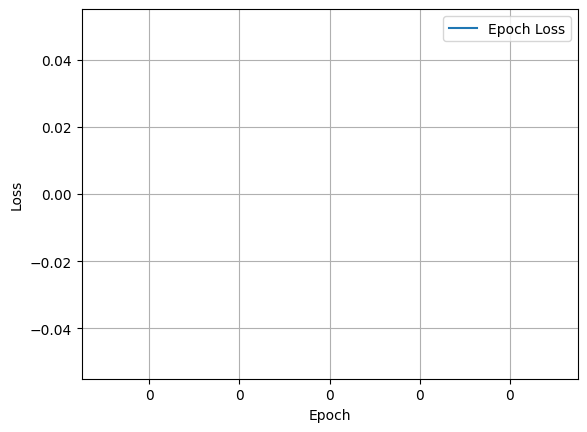

Plot saved as 'combined_loss_plot.png'


In [1]:
import os
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def custom_tick_formatter(x, pos):
    return int(x / 10)  # Divide by 10 to display 10 times lower values

def extract_epoch_loss(log_dirs):
    epoch_losses = []

    for log_dir in log_dirs:
        event_acc = EventAccumulator(log_dir)
        event_acc.Reload()

        for tensor_event in event_acc.Tensors('epoch_loss'):
            # Parse the tensor event data
            data = tf.make_ndarray(tensor_event.tensor_proto)

            # Extract the loss value (assuming it's a single value tensor)
            if data.shape == ():
                epoch_losses.append(data)

    return epoch_losses

initial_epoch= 1000
last_epoch=10000
steps_epoch=100
logs_dir="logs.bi.zb.0.2"

log_dirs = [f'{logs_dir}/epoch_{epoch}/train' for epoch in range(steps_epoch, last_epoch, steps_epoch)
            if os.path.exists(f'{logs_dir}/epoch_{epoch}/train')]

epoch_losses = extract_epoch_loss(log_dirs)
print(len(log_dirs))

num_epochs = len(epoch_losses)
x_values = np.arange(initial_epoch, initial_epoch + num_epochs * steps_epoch, steps_epoch)


# Create a figure and plot the data
fig, ax = plt.subplots()
ax.plot(x_values, epoch_losses, label='Epoch Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.grid(True)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(custom_tick_formatter))



# Save the plot to a file using a different method
fig = plt.gcf()
fig.savefig('images/combined_loss_plot.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.close(fig)  # Close the figure to release resources

# Optionally, display the saved file path
print("Plot saved as 'combined_loss_plot.png'")


In [1]:
import tensorflow as tf
print(tf.__version__)

2023-10-14 11:08:53.956466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0
